In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df =pd.read_csv("/home/renataqq/Documents/jupyter_notes/drinking_water_potability.csv")
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
''' percentage of null values in each column '''
#df.isnull().sum()
for feature in df.columns:
    print("{} \t {:.1f}% null values".format(feature, (df[feature].isnull().sum() / len(df)) * 100 ))


ph 	 15.0% null values
Hardness 	 0.0% null values
Solids 	 0.0% null values
Chloramines 	 0.0% null values
Sulfate 	 23.8% null values
Conductivity 	 0.0% null values
Organic_carbon 	 0.0% null values
Trihalomethanes 	 4.9% null values
Turbidity 	 0.0% null values
Potability 	 0.0% null values


In [5]:
# replace null values with mean
# data['ph'] = data['ph'].replace(np.nan, data.ph.mean())
# data['Sulfate'] = data['Sulfate'].replace(np.nan, data.ph.mean())
# data['Trihalomethanes'] = data['Trihalomethanes'].replace(np.nan, data.ph.mean())

# df['ph'].fillna(df['ph'].median(),inplace=True)
# df['Sulfate'].fillna(df['Sulfate'].median(),inplace=True)
# df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(),inplace=True)

''' preparing data for model '''
ph_mean = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = ph_mean

ph_mean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = ph_mean_1

sulf_mean = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_mean

sulf_mean_1 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_mean_1

traih_mean = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = traih_mean

trah_mean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = trah_mean_1


In [6]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.085378,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [7]:
df_norm = (df.iloc[:, :-1] - df.iloc[:, :-1].mean()) / (df.iloc[:, :-1].max() - df.iloc[:, :-1].min())

df_norm["Potability"] = df.iloc[:, -1]

# df_norm
# from sklearn.preprocessing import StandardScaler
# ''' standard scaler '''
# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [8]:
X = df_norm.iloc[:, :-1]
y = df_norm.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.3)

In [9]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075878,-0.081887,-0.031827,0.014785,0.017205,0.040092,0.003009,-0.036211,-0.003848
Hardness,0.075878,1.000000,-0.046899,-0.030054,-0.092718,-0.023915,0.003610,-0.012718,-0.014449,-0.013837
Solids,-0.081887,-0.046899,1.000000,-0.070148,-0.149809,0.013831,0.010242,-0.008849,0.019546,0.033743
Chloramines,-0.031827,-0.030054,-0.070148,1.000000,0.023490,-0.020486,-0.012653,0.016615,0.002363,0.023779
Sulfate,0.014785,-0.092718,-0.149809,0.023490,1.000000,-0.014196,0.027403,-0.025797,-0.009523,-0.026957
Conductivity,0.017205,-0.023915,0.013831,-0.020486,-0.014196,1.000000,0.020966,0.001238,0.005798,-0.008128
Organic_carbon,0.040092,0.003610,0.010242,-0.012653,0.027403,0.020966,1.000000,-0.012944,-0.027308,-0.030001
Trihalomethanes,0.003009,-0.012718,-0.008849,0.016615,-0.025797,0.001238,-0.012944,1.000000,-0.021540,0.007305
Turbidity,-0.036211,-0.014449,0.019546,0.002363,-0.009523,0.005798,-0.027308,-0.021540,1.000000,0.001581
Potability,-0.003848,-0.013837,0.033743,0.023779,-0.026957,-0.008128,-0.030001,0.007305,0.001581,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

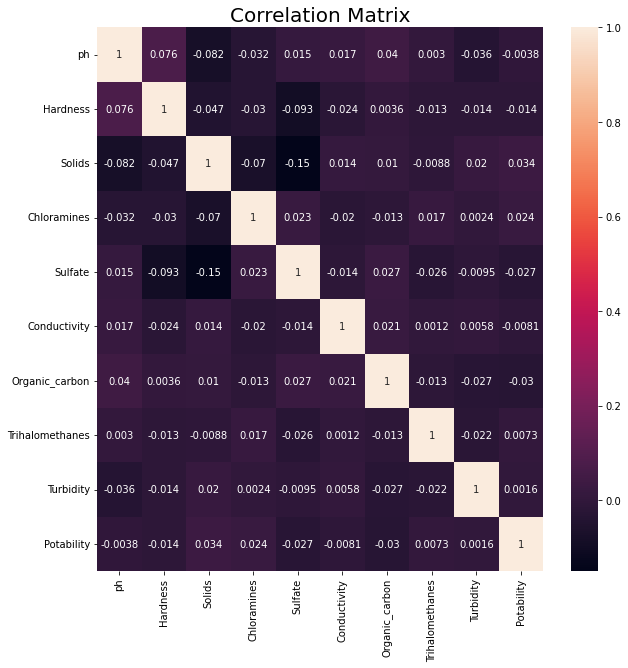

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix',fontsize=20)

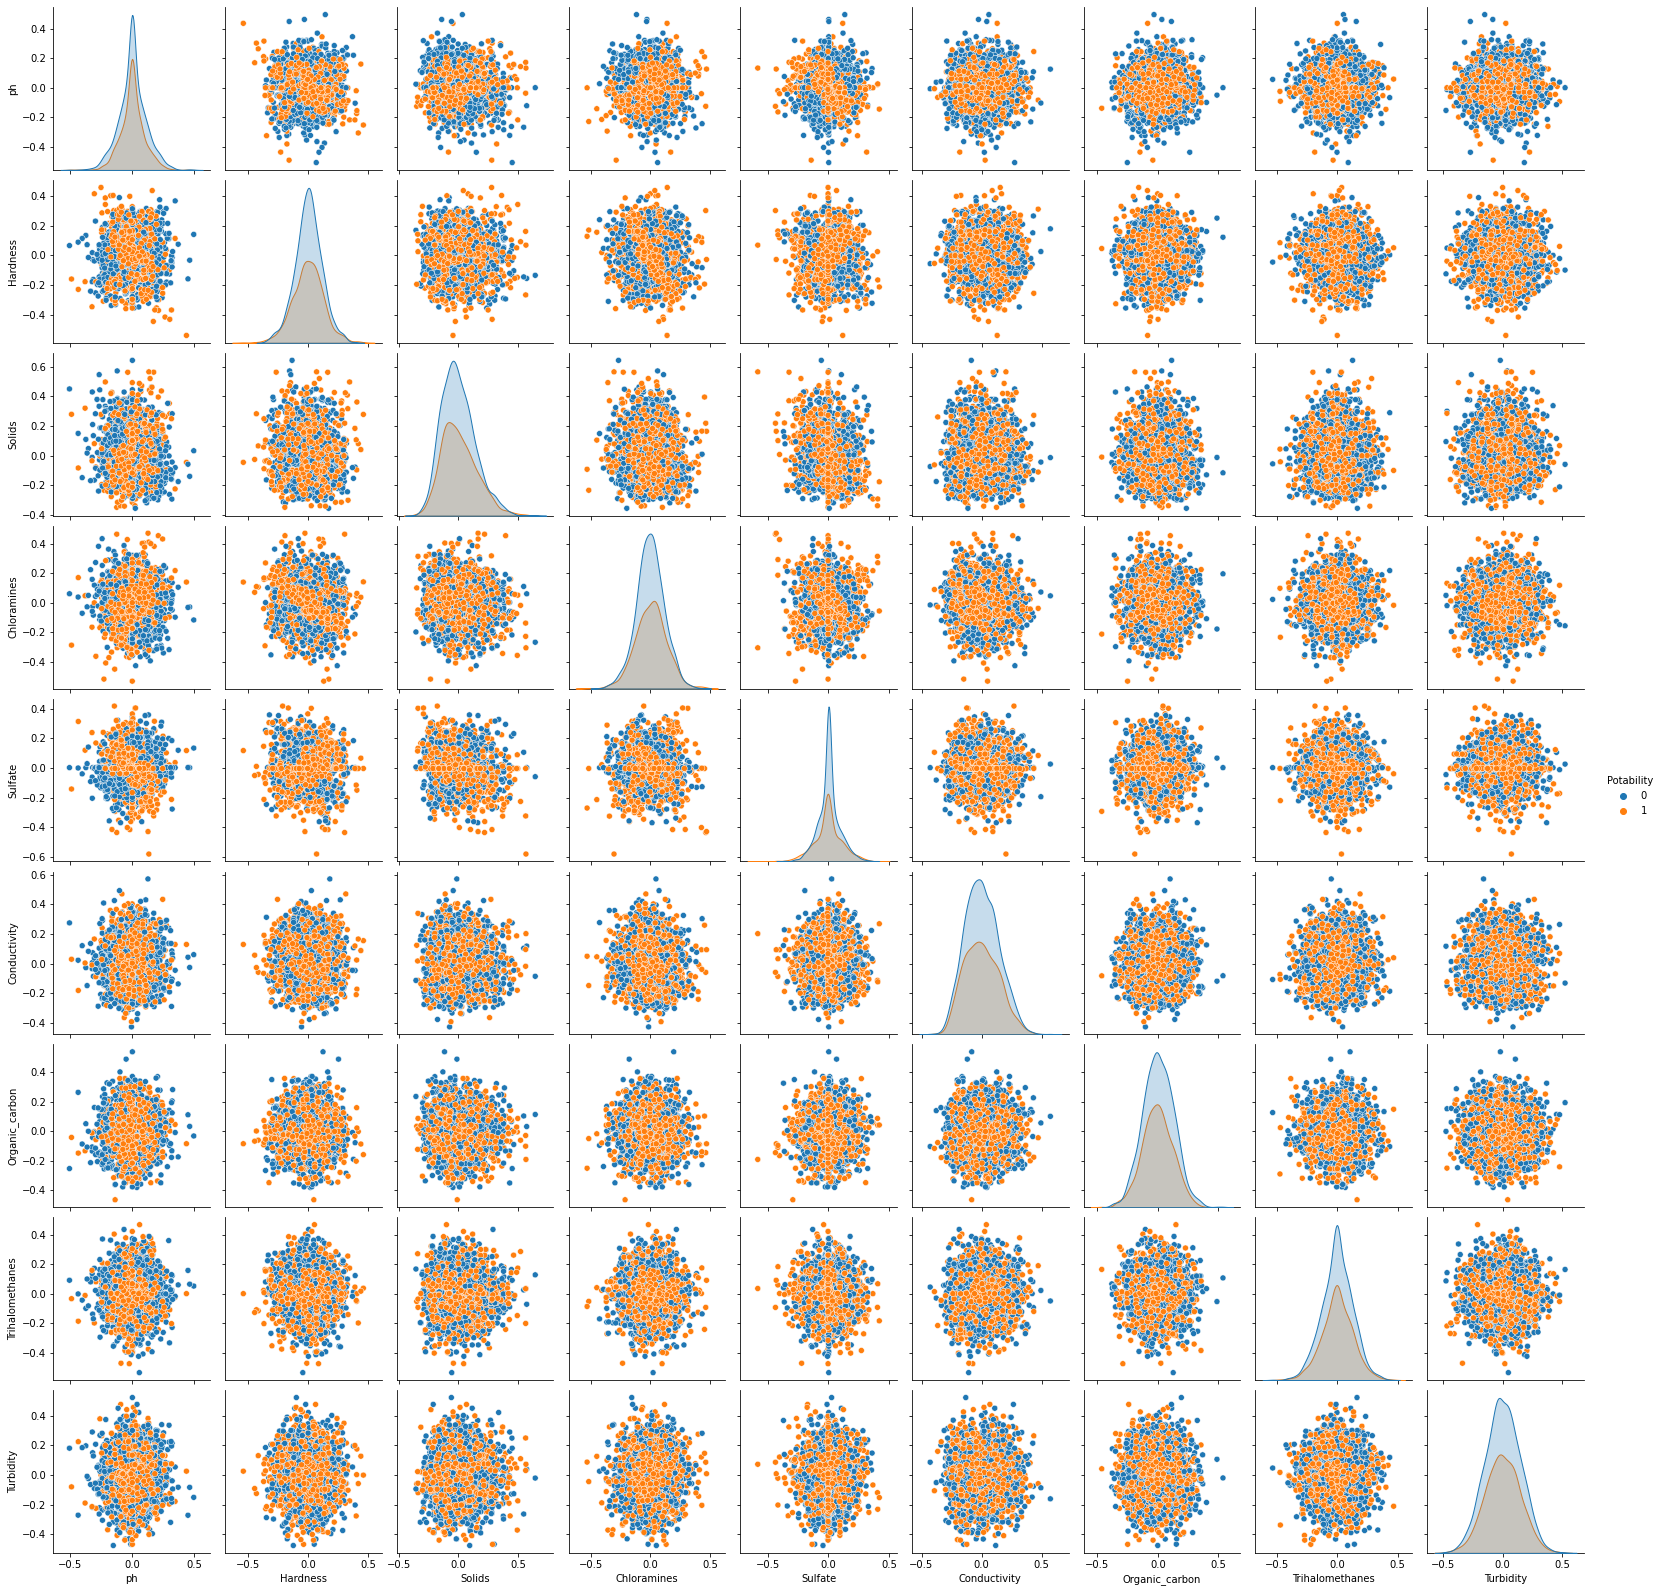

In [11]:
sns.pairplot(data=df_norm,hue='Potability');

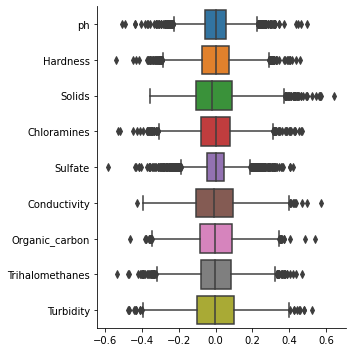

In [42]:
sns.catplot(data=df_norm.iloc[:, :-1], orient="h", kind="box");

[0.12730402 0.11478644 0.10827022 0.1058001  0.16243995 0.09674793
 0.09375718 0.09697749 0.09391668]


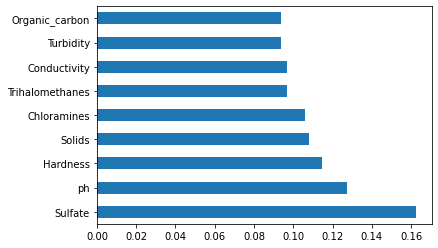

In [41]:
# lets see feature importance
from sklearn.ensemble import ExtraTreesClassifier
x = df.drop(['Potability'],axis=1)
y =df.Potability

Ext = ExtraTreesClassifier()
Ext.fit(x,y)
print(Ext.feature_importances_)

feature = pd.Series(Ext.feature_importances_,index=x.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind='barh');

In [54]:
# Функция для красивого вывода
def print_models(models):
    for model in models:
        print(model[0])
        print("test data accuracy score:",model[1])
        print("train data accuracy score:",model[2])
        try:
            print(model[3])
        except:pass
        print('-------------------------------------------------------------------------------------------------')

In [55]:
models_acc = []  

from nimbusml.linear_model import AveragedPerceptronBinaryClassifier
model = AveragedPerceptronBinaryClassifier(normalize='Yes')
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)   
models_acc.append(['AveragedPerceptronBinaryClassifier',str(accuracy_score(y_test, y_test_hat)*100),str(accuracy_score(y_train, y_train_hat)*100)])


Automatically adding a MinMax normalization transform, use 'norm=Warn' or 'norm=No' to turn this behavior off.
Training calibrator.
Elapsed time: 00:00:00.0233026


In [56]:
from sklearn.neighbors import KNeighborsClassifier
KNeighbor = KNeighborsClassifier(n_neighbors=15)
KNeighbor.fit(X_train, y_train)
y_train_hat = KNeighbor.predict(X_train)
y_test_hat = KNeighbor.predict(X_test)     
models_acc.append(['KNeighborsClassifier',str(accuracy_score(y_test, y_test_hat)*100),str(accuracy_score(y_train, y_train_hat)*100)])


In [57]:
from sklearn.svm import SVC
forms = ['linear', 'poly', 'rbf', 'sigmoid']
for line in forms:
    vector = SVC(kernel=line)
    vector.fit(X_train, y_train)
    y_train_hat = vector.predict(X_train)
    y_test_hat = vector.predict(X_test)  
    models_acc.append(['SVC ',str(accuracy_score(y_test, y_test_hat)*100),str(accuracy_score(y_train, y_train_hat)*100),'kernel = '+str(line)])


In [58]:
from sklearn.tree import DecisionTreeClassifier
best_score = 0
best_depth = 0
for i in range(1,21):
    DecisionTrees = DecisionTreeClassifier(max_depth=i,)
    DecisionTrees.fit(X_train, y_train)
    y_train_hat = DecisionTrees.predict(X_train)
    y_test_hat = DecisionTrees.predict(X_test)
    if best_score < accuracy_score(y_test, y_test_hat):
        best_score_train = accuracy_score(y_train, y_train_hat)
        best_score_test = accuracy_score(y_test, y_test_hat)
        best_depth = i
models_acc.append(['DecisionTreeClassifier',str(best_score_test*100),str(best_score_train*100),('best_depth = '+str(best_depth))])


In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X_train, y_train)    
y_train_hat = lda.predict(X_train)
y_test_hat = lda.predict(X_test)

models_acc.append(['LinearDiscriminantAnalysis',str(accuracy_score(y_test, y_test_hat)*100),str(accuracy_score(y_train, y_train_hat)*100)])


In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2')
lr.fit(X_train, y_train)
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)
models_acc.append(['LogisticRegression',str(accuracy_score(y_test, y_test_hat)*100),str(accuracy_score(y_train, y_train_hat)*100)])


In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1,random_state=123)
rf.fit(X_train, y_train)
for i in range(6,15):
    rf = RandomForestClassifier(n_jobs=-1,random_state=123, max_depth=i)
    rf.fit(X_train, y_train)
    y_train_hat = rf.predict(X_train)
    y_test_hat = rf.predict(X_test)
    best_score = 0
    best_depth = 0
    if best_score < accuracy_score(y_test, y_test_hat):
        best_score_train = accuracy_score(y_train, y_train_hat)
        best_score_test = accuracy_score(y_test, y_test_hat)
        best_depth = i
models_acc.append(['DecisionTreeClassifier',str(best_score_test*100),str(best_score_train*100),('best_depth = '+str(best_depth))])


In [63]:
print_models(models_acc)

AveragedPerceptronBinaryClassifier
test data accuracy score: 62.56358087487284
train data accuracy score: 61.5787178368949
-------------------------------------------------------------------------------------------------
KNeighborsClassifier
test data accuracy score: 64.80162767039674
train data accuracy score: 68.25119930222417
-------------------------------------------------------------------------------------------------
SVC 
test data accuracy score: 62.05493387589013
train data accuracy score: 60.53205407762756
kernel = linear
-------------------------------------------------------------------------------------------------
SVC 
test data accuracy score: 62.86876907426247
train data accuracy score: 64.23898822503271
kernel = poly
-------------------------------------------------------------------------------------------------
SVC 
test data accuracy score: 67.95523906408953
train data accuracy score: 72.9175752289577
kernel = rbf
---------------------------------------------------